# Extracting & Transforming Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Getting the Data:

conf_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recov_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
conf_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [4]:
conf_df = conf_df.sort_values(by=[conf_df.columns[-1]], ascending=False)
death_df = death_df.sort_values(by=[death_df.columns[-1]], ascending=False)
recov_df = recov_df.sort_values(by=[recov_df.columns[-1]], ascending=False)

In [5]:
# Transforming go to get dates as rows:

conf_df['location'] = np.where(conf_df['Country/Region']=='China', 'Ch-'+ conf_df['Province/State'],conf_df['Country/Region'])
conf_df = conf_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
conf_df = conf_df.sort_values(by=[conf_df.columns[-1]], ascending=False)
conf_ts = conf_df.T

death_df['location'] = np.where(death_df['Country/Region']=='China', 'Ch-'+ death_df['Province/State'],death_df['Country/Region'])
death_df = death_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
death_df = death_df.sort_values(by=[death_df.columns[-1]], ascending=False)
death_ts = death_df.T

recov_df['location'] = np.where(recov_df['Country/Region']=='China', 'Ch-'+ recov_df['Province/State'],recov_df['Country/Region'])
recov_df = recov_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
recov_df = recov_df.sort_values(by=[recov_df.columns[-1]], ascending=False)
recov_ts = recov_df.T

In [6]:
conf_ts.to_csv('conf_ts.csv')

In [7]:
conf_ts['Total'] = conf_ts.sum(axis=1)
death_ts['Total'] = death_ts.sum(axis=1)
recov_ts['Total'] = recov_ts.sum(axis=1)

In [8]:
conf_ts.shape

(57, 185)

In [9]:
conf_ts.head()

location,Ch-Hubei,Italy,Iran,Spain,Germany,France,"Korea, South",US,Switzerland,United Kingdom,...,Somalia,The Bahamas,Greenland,Guinea,Mauritania,Suriname,Montenegro,Nepal,Holy See,Total
1/22/20,444,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,555
1/23/20,444,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,653
1/24/20,549,0,0,0,0,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,941
1/25/20,761,0,0,0,0,3,2,2,0,0,...,0,0,0,0,0,0,0,1,0,1434
1/26/20,1058,0,0,0,0,3,3,5,0,0,...,0,0,0,0,0,0,0,1,0,2118


In [10]:
print('# of locations: ', len(list(conf_ts.columns)))
lst_locs = list(conf_ts.columns)
print(lst_locs)

# of locations:  185
['Ch-Hubei', 'Italy', 'Iran', 'Spain', 'Germany', 'France', 'Korea, South', 'US', 'Switzerland', 'United Kingdom', 'Netherlands', 'Austria', 'Norway', 'Belgium', 'Ch-Guangdong', 'Sweden', 'Ch-Henan', 'Ch-Zhejiang', 'Denmark', 'Ch-Hunan', 'Ch-Anhui', 'Ch-Jiangxi', 'Japan', 'Malaysia', 'Ch-Shandong', 'Cruise Ship', 'Canada', 'Ch-Jiangsu', 'Ch-Chongqing', 'Australia', 'Ch-Sichuan', 'Ch-Heilongjiang', 'Ch-Beijing', 'Czechia', 'Qatar', 'Portugal', 'Israel', 'Greece', 'Brazil', 'Ch-Shanghai', 'Finland', 'Ch-Hebei', 'Singapore', 'Pakistan', 'Ch-Fujian', 'Ireland', 'Slovenia', 'Romania', 'Estonia', 'Bahrain', 'Ch-Guangxi', 'Poland', 'Iceland', 'Ch-Shaanxi', 'Chile', 'Indonesia', 'Thailand', 'Luxembourg', 'Philippines', 'Egypt', 'Ch-Hong Kong', 'Ch-Yunnan', 'Saudi Arabia', 'Ch-Hainan', 'Iraq', 'India', 'Russia', 'Ch-Guizhou', 'Peru', 'Kuwait', 'Ch-Tianjin', 'Ch-Gansu', 'Lebanon', 'Ch-Shanxi', 'Ch-Liaoning', 'San Marino', 'South Africa', 'United Arab Emirates', 'Ecuador', 'S

In [11]:
#conf_ts = conf_ts.drop(['Cruise Ship','Total'], axis=1)

## Converting 0's to nan, for plotting pourposes.

In [12]:
# converting 0's to nan, for plotting pourposes.

lst_locs = list(conf_ts.columns)

conf_ts2 = conf_ts.copy()
death_ts2 = death_ts.copy()
recov_ts2 = recov_ts.copy()

for loc_n in lst_locs:
    conf_ts2[loc_n] = np.where(conf_ts2[loc_n]==0, np.nan, conf_ts2[loc_n])


## Generating First Appearence Data

In [13]:
f_app = conf_ts2.copy()
day_app = pd.DataFrame(f_app.isnull().sum()+1, columns=['Day_inf_detected'])
day_app.to_csv('../data/day_inf_dectectec.csv')

## Plotting Data

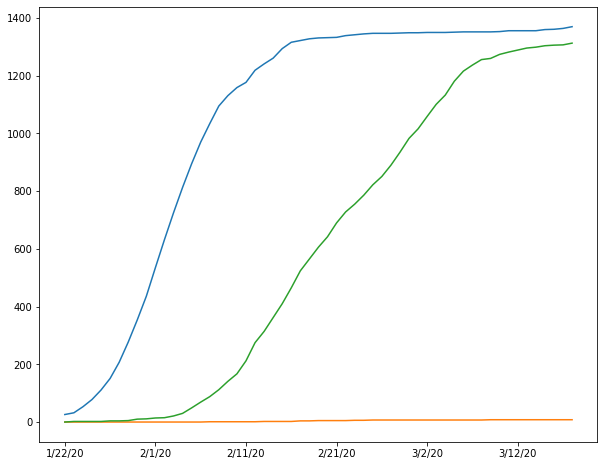

In [14]:
# Plotting each case locations:

fit = plt.figure(figsize=(10,8))
conf_ts2['Ch-Guangdong'].plot()
death_ts2['Ch-Guangdong'].plot()
recov_ts2['Ch-Guangdong'].plot()


In [15]:
# Top 16 locations
top_locs = lst_locs[:40]
print(top_locs)

['Ch-Hubei', 'Italy', 'Iran', 'Spain', 'Germany', 'France', 'Korea, South', 'US', 'Switzerland', 'United Kingdom', 'Netherlands', 'Austria', 'Norway', 'Belgium', 'Ch-Guangdong', 'Sweden', 'Ch-Henan', 'Ch-Zhejiang', 'Denmark', 'Ch-Hunan', 'Ch-Anhui', 'Ch-Jiangxi', 'Japan', 'Malaysia', 'Ch-Shandong', 'Cruise Ship', 'Canada', 'Ch-Jiangsu', 'Ch-Chongqing', 'Australia', 'Ch-Sichuan', 'Ch-Heilongjiang', 'Ch-Beijing', 'Czechia', 'Qatar', 'Portugal', 'Israel', 'Greece', 'Brazil', 'Ch-Shanghai']


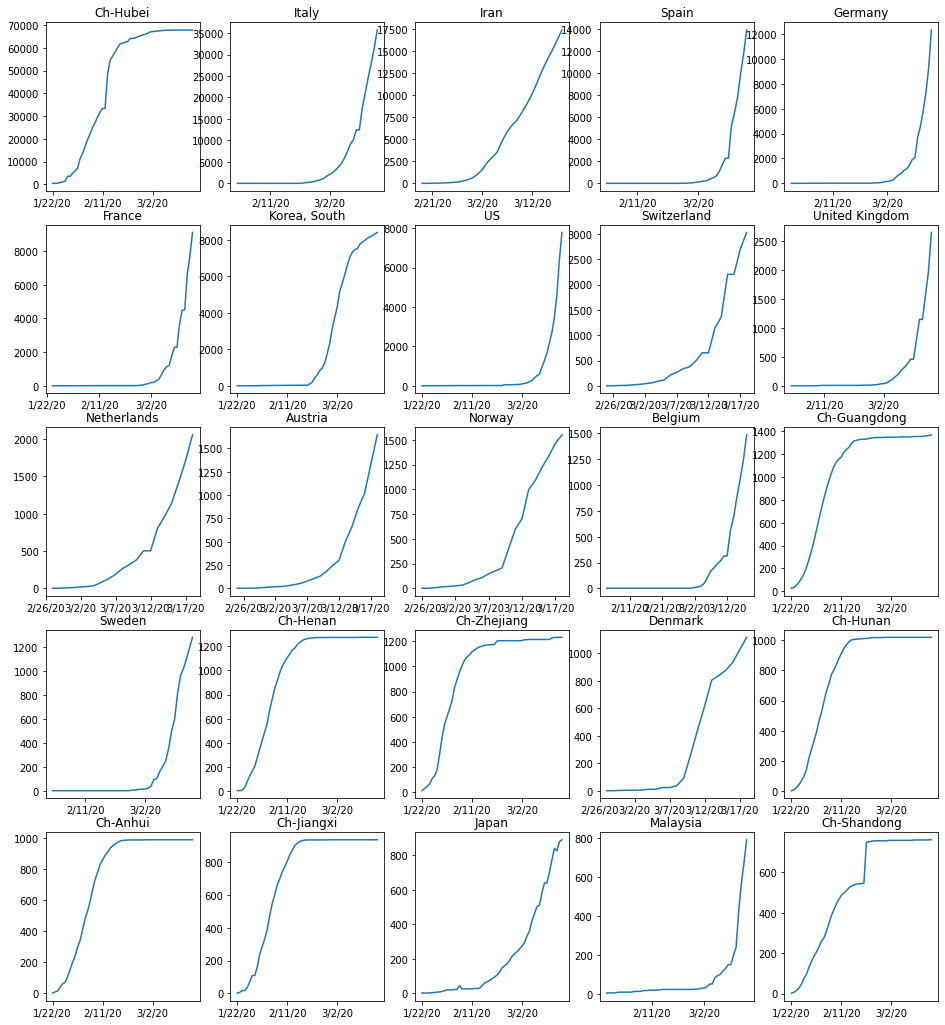

In [16]:
fig = plt.figure(figsize=(16,18))

# Divide the figure into a 4x4 grid:

ax1 = fig.add_subplot(5,5,1)
ax2 = fig.add_subplot(5,5,2)
ax3 = fig.add_subplot(5,5,3)
ax4 = fig.add_subplot(5,5,4)
ax5 = fig.add_subplot(5,5,5)
ax6 = fig.add_subplot(5,5,6)
ax7 = fig.add_subplot(5,5,7)
ax8 = fig.add_subplot(5,5,8)
ax9 = fig.add_subplot(5,5,9)
ax10= fig.add_subplot(5,5,10)
ax11= fig.add_subplot(5,5,11)
ax12= fig.add_subplot(5,5,12)
ax13= fig.add_subplot(5,5,13)
ax14= fig.add_subplot(5,5,14)
ax15= fig.add_subplot(5,5,15)
ax16= fig.add_subplot(5,5,16)
ax17= fig.add_subplot(5,5,17)
ax18= fig.add_subplot(5,5,18)
ax19= fig.add_subplot(5,5,19)
ax20= fig.add_subplot(5,5,20)
ax21= fig.add_subplot(5,5,21)
ax22= fig.add_subplot(5,5,22)
ax23= fig.add_subplot(5,5,23)
ax24= fig.add_subplot(5,5,24)
ax25= fig.add_subplot(5,5,25)

ax_lst = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,
          ax16,ax17,ax18,ax19,ax20,ax21,ax22,ax23,ax24,ax25]

for count, axn in enumerate(ax_lst): 
    conf_ts2[top_locs[count]].plot(ax=axn)
    axn.set_title(top_locs[count])

# SciPy to Determine Curves

In [192]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Len = 41
x = np.arange(len(conf_ts['Italy']))


#y = conf_ts['Ch-Anhui'].values
#y = conf_ts['Iran'].values
#y = conf_ts['Ch-Henan'].values
#y = conf_ts['Ch-Hubei'].values
#y = conf_ts['South Korea'].values
#y = conf_ts['Italy'].values
#y = conf_ts['Ch-Guangdong'].values
y = conf_ts['Mexico'].values
#y = conf_ts['Japan'].values
#y = conf_ts['France'].values
#y = conf_ts['Others'].values
#y = conf_ts['US'].values
#y = conf_ts['Hong Kong'].values
#y = conf_ts['Total'].values
#y = conf_ts['Germany'].values
#y = conf_ts['Spain'].values
#y = conf_ts['Ch-Ningxia'].values
#y = conf_ts['Bahrain'].values
#y = conf_ts['Kuwait'].values
#y = conf_ts['Ch-Inner Mongolia'].values
#y = conf_ts['Ch-Jilin'].values
#y = conf_ts['Switzerland'].values
#y = conf_ts['Denmark'].values



# Logistic Regretion Formula:
# L / (1 + e ^-k( x - a ))
# L -> Max Growth ,  a -> x value at midpoint ,  k -> Growth Rate

def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

# Limitar: 0 < L < 100,000 ;  0 < k < 1 ;  0 < a < 50

In [193]:
popt, pcov = curve_fit(func, x, y, bounds=(0, [90000, 1, 100]))
popt

array([208.00563221,   0.4324614 ,  56.33903798])

R2:  0.9823519357525616


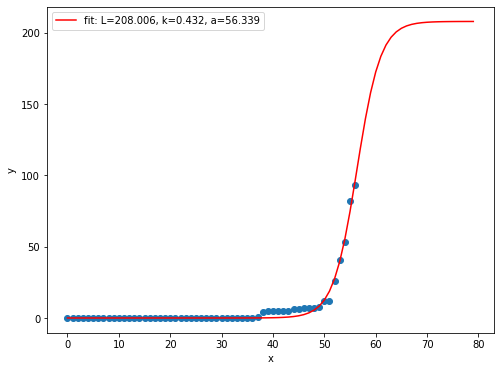

In [194]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x,y)
x2 = np.arange(80)
plt.plot(x2, func(x2, *popt), 'r-', label='fit: L=%5.3f, k=%5.3f, a=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
r2 = r2_score(y, func(x, *popt))
print('R2: ',r2)

# Building DataFrame with Crucial Data


In [195]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

res_df = pd.DataFrame()

res_df['Total_conf'] =  conf_df.iloc[:,-1]
res_df['Total_death'] =  death_df.iloc[:,-1]
res_df['Total_recov'] =  recov_df.iloc[:,-1]


row_df = pd.DataFrame(res_df.sum(axis = 0), columns=['Worldwide']).T
res_df = pd.concat([res_df, row_df])

#res_df.iloc[0:40]


In [196]:
loc_list = list(res_df.index[:50])
loc_list.append('Mexico')

log_g_curves = []

def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

for loc_i in loc_list:
    x = np.arange(len(conf_ts[loc_i]))
    y = conf_ts[loc_i].values

    popt, pcov = curve_fit(func, x, y, bounds=(0, [90000, 1, 100]))
    
    L = popt[0]
    k = popt[1]
    a = popt[2]
    r2 = r2_score(y, func(x, *popt))
    if loc_i == 'Total':
        loc_i = 'Worldwide'
    
    dict = {'location':loc_i,'L':L,'k':k,'a':a,'R2':r2}
    log_g_curves.append(dict)

In [197]:
final_1 = pd.DataFrame(log_g_curves).set_index('location')
final_1.tail()

,L,k,a,R2
location,,,,
Slovenia,292.821222,0.643350,51.214852,0.999392
Romania,542.422534,0.323064,56.555192,0.990007
Estonia,262.057174,0.801938,52.306988,0.994401
Bahrain,316.479390,0.207325,49.430952,0.977750
Mexico,208.005632,0.432461,56.339038,0.982352


In [198]:
res = final_1
pop_china = pd.read_csv('../Chinese_City_Population.csv')
pop_china_r = pd.read_csv('../Data/china_province_population.csv')

In [199]:
# Converting the China population to the needed format:
pop_china2 = pop_china.groupby('admin').mean().drop(['population','population_proper'], axis=1)



#pop_china2['Population'] = pop_china.groupby('admin').sum()['population_proper']

new_index = ['Ch-'+str(index) for index in list(pop_china2.index)]
pop_china2['location'] = new_index
pop_china2 = pop_china2.set_index('location')

In [200]:
pop_china_r = pop_china_r.set_index('location').rename(columns={'population_r':'Population'})
pop_china2 = pop_china2.join(pop_china_r)

In [201]:
params1 = res.join(pop_china2)
params1.head()

,L,k,a,R2,lat,lng,Population
location,,,,,,,
Ch-Hubei,67709.534513,0.234945,18.688297,0.994011,30.861038,112.745717,59020000.0
Italy,74036.442874,0.220747,56.299334,0.998200,NaN,NaN,NaN
Iran,20914.010509,0.236461,49.942914,0.996700,NaN,NaN,NaN
Spain,19597.998453,0.412837,53.917985,0.996695,NaN,NaN,NaN
Germany,90000.000000,0.276990,62.710671,0.998141,NaN,NaN,NaN


In [286]:
missing_lst = list(params1[params1.Population.isnull()==True].index)


In [287]:
#missing_lst = ['South Korea', 'Italy', 'Iran', 'Others', 'Japan', 'Spain', 'Singapore','US', 'Hong Kong','Mexico']

world_pop = pd.read_csv('../population_world.csv')
world_pop = world_pop.rename(columns={"Country Name": "location", "2018": "Population2"}) #.set_index('location')

world_loc = [{'location': i} for i in missing_lst]

world_loc = pd.DataFrame(world_loc)

world_pop = world_pop[world_pop['location'].isin(missing_lst)]
world_pop = world_pop.drop(['Country Code','Indicator Name','Indicator Code'], axis=1).reset_index(drop=True)


result = world_pop.merge(world_loc, on='location').set_index('location')

In [288]:
params2 = params1.join(result)

In [289]:

params2['Population'] = np.where(params2.Population.isnull()==True, params2.Population2,params2.Population)

params2 = params2.drop(['Population2'],axis=1)
final2 = params2.copy()
final2 = final2.drop(['lat','lng'], axis=1)

In [290]:
#results = final2[((final2.L < 79999) & (final2.a < 51)) | (final2.Population == 126190788.0) ].drop(['Cruise Ship'])
results = final2[(final2.L < 89999) | (final2.Population == 126190788.0)].drop(['Cruise Ship','Pakistan'])

results

,L,k,a,R2,Population
location,,,,,
Ch-Hubei,67709.534513,0.234945,18.688297,0.994011,59020000.0
Italy,74036.442874,0.220747,56.299334,0.998200,60431283.0
Iran,20914.010509,0.236461,49.942914,0.996700,81800269.0
Spain,19597.998453,0.412837,53.917985,0.996695,46723749.0
France,26028.942961,0.257404,58.389975,0.995368,66987244.0
"Korea, South",8213.511172,0.335396,39.683215,0.999410,51635256.0
US,51636.445282,0.287957,61.952988,0.998805,327167434.0
Switzerland,4636.363120,0.353793,54.101925,0.991942,8516543.0
Netherlands,5317.005839,0.266315,57.767999,0.997793,17231017.0


# Adding Variables

In [291]:
# Importing Variables
data_pob = pd.read_csv('../data/compiled_metrics.csv')
data_air = pd.read_csv('../data/quality_air_compiled.csv')
day_det = pd.read_csv('../data/day_inf_dectectec.csv')
data_area = pd.read_csv('../data/km2_world_all.csv')


In [292]:
data_area2= data_area.set_index('location')
data_air2 = data_air[['location_adj','Air_Pm2.5']].set_index('location_adj')
data_pob2 = data_pob.drop('Region',axis=1).set_index('location_adj')
day_det2 = day_det.set_index('location')

In [293]:
res4 = results.join(data_area2).join(data_air2).join(data_pob2).join(day_det2)
res4

,L,k,a,R2,Population,km2,Air_Pm2.5,Male_population,Over_65,Foreign_turism,health_exp_usd,Day_inf_detected
location,,,,,,,,,,,,
Ch-Hubei,67709.534513,0.234945,18.688297,0.994011,59020000.0,185900.0,59.254700,24973000.0,6059000.0,3070000.0,590.141205,1
Italy,74036.442874,0.220747,56.299334,0.998200,60431283.0,301338.0,16.497100,29383702.0,13749132.0,61567200.0,3427.306466,10
Iran,20914.010509,0.236461,49.942914,0.996700,81800269.0,1648000.0,48.950000,41358928.0,5058998.0,7295000.0,1563.751678,29
Spain,19597.998453,0.412837,53.917985,0.996695,46723749.0,505990.0,9.914190,22942930.0,9054365.0,82773000.0,3259.802775,11
France,26028.942961,0.257404,58.389975,0.995368,66987244.0,643801.0,11.959620,32432383.0,13420643.0,89322000.0,4782.288549,3
"Korea, South",8213.511172,0.335396,39.683215,0.999410,51635256.0,100210.0,25.138890,25860546.0,7445058.0,15347000.0,2711.738257,1
US,51636.445282,0.287957,61.952988,0.998805,327167434.0,9834000.0,7.363650,161882398.0,51717496.0,79745920.0,9869.742382,1
Switzerland,4636.363120,0.353793,54.101925,0.991942,8516543.0,41285.0,10.444070,4221895.0,1586054.0,10362000.0,7867.394505,35
Netherlands,5317.005839,0.266315,57.767999,0.997793,17231017.0,41543.0,12.086000,8577438.0,3307699.0,18780000.0,5251.241578,37


In [294]:
res4.to_csv('res_data.csv')

In [295]:
res5 = res4.copy()
res5.Male_population = res5.Male_population / res5.Population
res5.Over_65 = res5.Over_65 / res5.Population
res5.head()

,L,k,a,R2,Population,km2,Air_Pm2.5,Male_population,Over_65,Foreign_turism,health_exp_usd,Day_inf_detected
location,,,,,,,,,,,,
Ch-Hubei,67709.534513,0.234945,18.688297,0.994011,59020000.0,185900.0,59.25470,0.423128,0.102660,3070000.0,590.141205,1
Italy,74036.442874,0.220747,56.299334,0.998200,60431283.0,301338.0,16.49710,0.486233,0.227517,61567200.0,3427.306466,10
Iran,20914.010509,0.236461,49.942914,0.996700,81800269.0,1648000.0,48.95000,0.505609,0.061846,7295000.0,1563.751678,29
Spain,19597.998453,0.412837,53.917985,0.996695,46723749.0,505990.0,9.91419,0.491034,0.193785,82773000.0,3259.802775,11
France,26028.942961,0.257404,58.389975,0.995368,66987244.0,643801.0,11.95962,0.484158,0.200346,89322000.0,4782.288549,3


## Normilizing

In [296]:
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler()
#x_data = res5[['Population','km2','Air_Pm2.5','Male_population','Over_65','Foreign_turism','health_exp_usd','Day_inf_detected']]
#x_data_n= scaler.fit_transform(x_data)
#res5['Population']=x_data_n[:,0]
#res5['km2'] = x_data_n[:,1]
#res5['Air_Pm2.5'] = x_data_n[:,1]
#res5['Male_population'] = x_data_n[:,1]
#res5['Over_65'] = x_data_n[:,1]
#res5['Foreign_turism'] = x_data_n[:,1]
#res5['health_exp_usd'] = x_data_n[:,1]
#res5['Day_inf_detected'] = x_data_n[:,1]



# Splitting the Data

In [338]:
# Splitting Data
mex_row = res4.loc['Mexico']

y_L = res5['L'].drop('Mexico')
y_k = res5['k'].drop('Mexico')
y_a = res5['a'].drop('Mexico')

# Trying with select variables
x_L = res5[['Population','Air_Pm2.5','Male_population','Over_65','health_exp_usd']]
x_k = res5[['L', 'km2','Air_Pm2.5','Population','Foreign_turism','health_exp_usd','Day_inf_detected']]
x_a = res5[['km2','Population','Day_inf_detected']]

# Trying with all the variables
#x_L = res5[['Population','km2','Air_Pm2.5','Male_population','Over_65','Foreign_turism','health_exp_usd','Day_inf_detected']]
#x_k = res5[['Population','km2','Air_Pm2.5','Male_population','Over_65','Foreign_turism','health_exp_usd','Day_inf_detected']]
#x_a = res5[['Population','km2','Air_Pm2.5','Male_population','Over_65','Foreign_turism','health_exp_usd','Day_inf_detected']]


In [339]:
print(y_L.shape)
print(y_k.shape)
print(y_a.shape)
print(x_L.shape)
print(x_k.shape)
print(x_a.shape)
print(mex_row.shape)

(43,)
(43,)
(43,)
(44, 5)
(44, 7)
(44, 3)
(12,)


In [340]:
mex_row

L                   2.080056e+02
k                   4.324614e-01
a                   5.633904e+01
R2                  9.823519e-01
Population          1.261908e+08
km2                 1.973000e+06
Air_Pm2.5           2.123615e+01
Male_population     6.172082e+07
Over_65             9.115625e+06
Foreign_turism      4.131300e+07
health_exp_usd      9.718232e+02
Day_inf_detected    3.800000e+01
Name: Mexico, dtype: float64

In [341]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_L_norm = scaler.fit_transform(x_L)
x_k_norm = scaler.fit_transform(x_k)
x_a_norm = scaler.fit_transform(x_a)

mex_L_test = x_L_norm[-1]
mex_k_test = x_k_norm[-1]
mex_a_test = x_a_norm[-1]

x_L_data = x_L_norm[:-1]
x_k_data = x_k_norm[:-1]
x_a_data = x_a_norm[:-1]

## Generating Testing Data

In [342]:
# Testing Data
hubei_L_test = x_L_norm[0]
hubei_k_test = x_k_norm[0]
hubei_a_test = x_a_norm[0]

iran_L_test = x_L_norm[1]
iran_k_test = x_k_norm[1]
iran_a_test = x_a_norm[1]

sk_L_test = x_L_norm[2]
sk_k_test = x_k_norm[2]
sk_a_test = x_a_norm[2]

us_L_test = x_L_norm[3]
us_k_test = x_k_norm[3]
us_a_test = x_a_norm[3]

guangdong_L_test = x_L_norm[4]
guangdong_k_test = x_k_norm[4]
guangdong_a_test = x_a_norm[4]


In [343]:
print(y_L.shape)
print(y_k.shape)
print(y_a.shape)

print(x_L_data.shape)
print(mex_L_test.shape)

# Shapes OK!

(43,)
(43,)
(43,)
(43, 5)
(5,)


In [344]:
from sklearn.model_selection import train_test_split

# Splitting for L
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(x_L_data, y_L, test_size=0.08)

# Splitting for k
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(x_k_data, y_k, test_size=0.08)

# Splitting for a
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(x_a_data, y_a, test_size=0.08)


In [345]:
# Models to Try:
# - RandomForest
# - LinearRegression
# - Lasso
# - ElasticNet
# - RidgeRegression
# - SVR
# - EnsembleRegressors

from sklearn.metrics import r2_score    #r2_score(y_true, y_pred)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Modelling for L

In [346]:
# Linear Regression
mod_L_linear = LinearRegression()
mod_L_linear.fit(X_train_L, y_train_L)
print(mod_L_linear.score(X_train_L, y_train_L))
y_pred_L = mod_L_linear.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.24636101422521328
-1826.0760391186582


In [347]:
# Random Forest
mod_L_ranfor = RandomForestRegressor()
mod_L_ranfor.fit(X_train_L, y_train_L)
print(mod_L_ranfor.score(X_train_L, y_train_L))
y_pred_L = mod_L_ranfor.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.8756662205023871
-5928.671285830875


In [348]:
# Lasso
mod_L_lasso = Lasso()
mod_L_lasso.fit(X_train_L, y_train_L)
print(mod_L_lasso.score(X_train_L, y_train_L))
y_pred_L = mod_L_lasso.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.24635985175827824
-1819.19844597124


In [349]:
# ElasticNet
mod_L_elNet = ElasticNet()
mod_L_elNet.fit(X_train_L, y_train_L)
print(mod_L_elNet.score(X_train_L, y_train_L))
y_pred_L = mod_L_elNet.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.03451313555649205
-324.09852636464984


In [350]:
#RidgeRegression
mod_L_ridge = Ridge()
mod_L_ridge.fit(X_train_L, y_train_L)
print(mod_L_ridge.score(X_train_L, y_train_L))
y_pred_L = mod_L_ridge.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.1875838791958515
-653.0092126783178


In [351]:
#SVR
mod_L_SVR = SVR()
mod_L_SVR.fit(X_train_L, y_train_L)
print(mod_L_SVR.score(X_train_L, y_train_L))
y_pred_L = mod_L_SVR.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

-0.15816982583394146
-0.019811623773336784


In [352]:
print(y_pred_L)
print(y_test_L.values)

[1018.67085247 1022.86755556 1016.56710484 1016.92027755]
[1347.14375032 1495.36282931 1017.6806305   481.75572877]


## Modelling for k

In [353]:
# Linear Regression
mod_k_linear = LinearRegression()
mod_k_linear.fit(X_train_k, y_train_k)
print(mod_k_linear.score(X_train_k, y_train_k))
y_pred_k = mod_k_linear.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.3108012216100451
0.2945957270579288


In [354]:
# Random Forest
mod_k_ranfor = RandomForestRegressor()
mod_k_ranfor.fit(X_train_k, y_train_k)
print(mod_k_ranfor.score(X_train_k, y_train_k))
y_pred_k = mod_k_ranfor.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.8992595056762958
-0.03365431484608061


In [355]:
# Lasso
mod_k_lasso = Lasso()
mod_k_lasso.fit(X_train_k, y_train_k)
print(mod_k_lasso.score(X_train_k, y_train_k))
y_pred_k = mod_k_lasso.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.0
-0.07269616388135436


In [356]:
#SVR
mod_k_SVR = SVR()
mod_k_SVR.fit(X_train_k, y_train_k)
print(mod_k_SVR.score(X_train_k, y_train_k))
y_pred_k = mod_k_SVR.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.6306463503002318
0.37464179091426186


In [357]:
print(y_pred_k)
print(y_test_k.values)

[0.2899161  0.49505217 0.31258378 0.50989959]
[0.22796175 0.28848451 0.32843209 0.64334954]


## Modelling for a

In [358]:
# Linear Regression
mod_a_linear = LinearRegression()
mod_a_linear.fit(X_train_a, y_train_a)
print(mod_a_linear.score(X_train_a, y_train_a))
y_pred_a = mod_a_linear.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.4267358787339732
0.3545713199581597


In [359]:
# Random Forest
mod_a_ranfor = RandomForestRegressor()
mod_a_ranfor.fit(X_train_a, y_train_a)
print(mod_a_ranfor.score(X_train_a, y_train_a))
y_pred_a = mod_a_ranfor.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.8918055554430877
0.9096998703810163


In [360]:
# Lasso
mod_a_lasso = Lasso()
mod_a_lasso.fit(X_train_a, y_train_a)
print(mod_a_lasso.score(X_train_a, y_train_a))
y_pred_a = mod_a_lasso.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.3246656442865685
0.45055998561680866


In [361]:
#SVR
mod_a_SVR = SVR()
mod_a_SVR.fit(X_train_a, y_train_a)
print(mod_a_SVR.score(X_train_a, y_train_a))
y_pred_a = mod_a_SVR.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.20527418844005985
0.3108142126102377


In [362]:
print(y_pred_a)
print(y_test_a.values)

[51.93607215 42.52209142 39.60268468 51.94384542]
[49.52291951 56.29933432 13.09454876 61.06299742]


# Getting Values for Mexico

In [363]:
mex_pred_L = mod_L_ranfor.predict([mex_L_test])
mex_pred_k = mod_k_ranfor.predict([mex_k_test])
mex_pred_a = mod_a_ranfor.predict([mex_a_test])


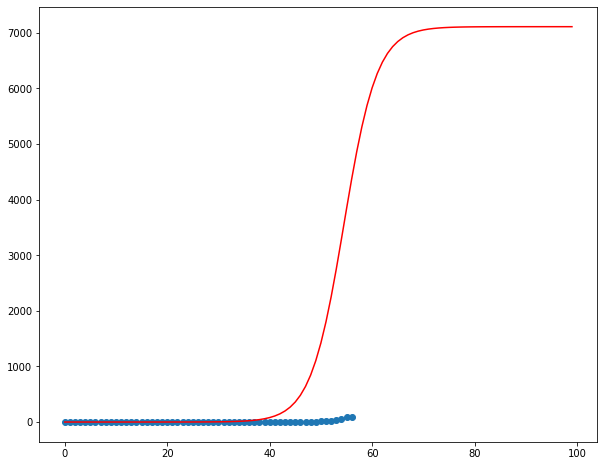

In [364]:
def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

conf_ts = pd.read_csv('conf_ts.csv')

x1 = np.arange(len(conf_ts['Korea, South']))
x2 = np.arange(100)
fig = plt.figure(figsize=(10,8))
plt.scatter(x1, conf_ts.Mexico)
plt.plot(x2, func(x2, mex_pred_L, mex_pred_k, mex_pred_a), 'r-')


# Testing for other countries

In [365]:
hubei_pred_L = mod_L_ranfor.predict([hubei_L_test])
hubei_pred_k = mod_k_ranfor.predict([hubei_k_test])
hubei_pred_a = mod_a_linear.predict([hubei_a_test])

iran_pred_L = mod_L_ranfor.predict([iran_L_test])
iran_pred_k = mod_k_ranfor.predict([iran_k_test])
iran_pred_a = mod_a_linear.predict([iran_a_test])

sk_pred_L = mod_L_ranfor.predict([sk_L_test])
sk_pred_k = mod_k_ranfor.predict([sk_k_test])
sk_pred_a = mod_a_linear.predict([sk_a_test])

us_pred_L = mod_L_ranfor.predict([us_L_test])
us_pred_k = mod_k_ranfor.predict([us_k_test])
us_pred_a = mod_a_linear.predict([us_a_test])

guangdong_pred_L = mod_L_ranfor.predict([guangdong_L_test])
guangdong_pred_k = mod_k_ranfor.predict([guangdong_k_test])
guangdong_pred_a = mod_a_linear.predict([guangdong_a_test])

## Testing Hubei

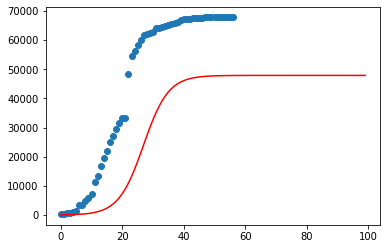

In [366]:
x1 = np.arange(len(conf_ts['Mexico']))
x2 = np.arange(100)
plt.scatter(x1, conf_ts['Ch-Hubei'])
plt.plot(x2, func(x2, hubei_pred_L, hubei_pred_k, hubei_pred_a), 'r-')

## Testing Iran

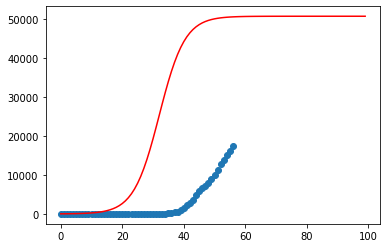

In [367]:
x1 = np.arange(len(conf_ts['Mexico']))
x2 = np.arange(100)
plt.scatter(x1, conf_ts['Iran'])
plt.plot(x2, func(x2, iran_pred_L, iran_pred_k, iran_pred_a), 'r-')

## Testing South Korea

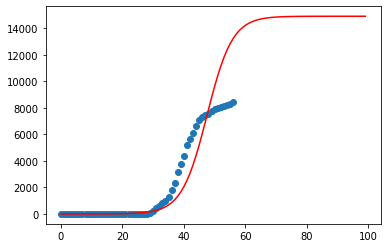

In [368]:
x1 = np.arange(len(conf_ts['Mexico']))
x2 = np.arange(100)
plt.scatter(x1, conf_ts['Korea, South'])
plt.plot(x2, func(x2, sk_pred_L, sk_pred_k, sk_pred_a), 'r-')

## Testing US

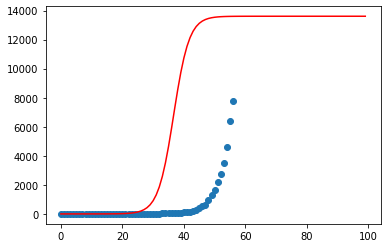

In [369]:
x1 = np.arange(len(conf_ts['Mexico']))
x2 = np.arange(100)
plt.scatter(x1, conf_ts['US'])
plt.plot(x2, func(x2, us_pred_L, us_pred_k, us_pred_a), 'r-')

## Testing Guangdong

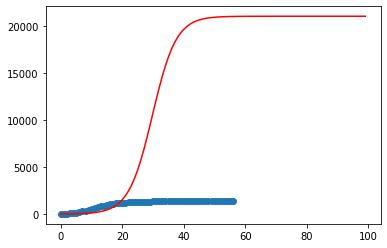

In [370]:
x1 = np.arange(len(conf_ts['Mexico']))
x2 = np.arange(100)
plt.scatter(x1, conf_ts['Ch-Guangdong'])
plt.plot(x2, func(x2, guangdong_pred_L, guangdong_pred_k, guangdong_pred_a), 'r-')